In [3]:
import numpy as np
import pandas as pd
import os

In [5]:
!ls ../data/pge/

dx_wires_down.csv ignitions.csv     tx_wires_down.csv


In [7]:
datadir = os.path.join('..','data','pge')

In [10]:
df = pd.read_csv(os.path.join(datadir, 'dx_wires_down.csv'), skiprows=5, parse_dates[['Out Date','In\nTime']])

In [11]:
df.head()

,Division,District Name,Feeder Name,Feeder #,Device,Oper #,Out Date,FNL,In Date,In\nTime,...,Open Point\nLatitude,Open Point\nLongitude,Fault Location,Weather,Failed Equipment,Failed Equipment\nCondition,Event #,Const\nType,Sus/Mom,Tier
0,FRESNO,FRESNO,BARTON-1108,253571108.0,FUSE,D5460 ...,20150101.0,19.0,20150101.0,546.0,...,0.00000,0.00000,1 POLE N/OF D5460 ...,Clear;32-90 F ...,"Conductor, Overhead","Broken, wire on ground",15-0002029,OH,Sus,Non 2/3
1,FRESNO,FRESNO,BARTON-1108,253571108.0,RECLOSER,R3370 ...,20150101.0,7.0,20150101.0,540.0,...,0.00000,0.00000,WIRE DOWN AT MTR# 1004010983 ...,Clear;32-90 F ...,"Conductor, Overhead","Broken, wire on ground",15-0002034,OH,Sus,Non 2/3
2,FRESNO,FRESNO,BARTON-1110,253571110.0,OCB,1110/2 ...,20150101.0,9.0,20150101.0,615.0,...,0.00000,0.00000,"KRUPENS,DOUG/6: BARTON & BELMONT ...",Clear;32-90 F ...,"Conductor, Overhead","Broken, wire on ground",15-0002018,OH,Sus,Non 2/3
3,PENINSULA,PENINSULA,BELMONT-1103,24031103.0,TRANSFORMER,...,20150101.0,1845.0,20150102.0,156.0,...,37.50784,-122.29187,"IRO 7 GARDEN COURT, BELMONT ...",Clear;32 - 90 F ...,Secondary,"Broken, wire on ground",15-0002125,OH,Sus,Non 2/3
4,NORTH VALLEY,SHASTA,BURNEY-1101,103311101.0,RECLOSER,45984,20150101.0,1417.0,20150101.0,2042.0,...,40.87930,-121.67422,C/OUT POLE 10059 ...,Strong winds;32 - 90 F ...,"Conductor, Overhead","Broken, wire on ground",15-0002105,OH,Sus,Tier 2


In [ ]:
renames = {'Division': 'division', 
           'District Name': 'district', 
           'Feeder Name': 'feeder', 
           'Feeder #': 'feeder_number',
           'In Date': 'date',
           'In\nTime': 'time',
           'OIS #': 'ois_number',
           'Device': ''
          }

In [12]:
df.keys()

Index(['Division', 'District Name', 'Feeder Name', 'Feeder #', 'Device',
       'Oper #', 'Out Date', 'FNL', 'In Date', 'In\nTime', 'OIS #', 'Duration',
       'Outage Level', 'Basic Cause', 'Supplemental Cause', 'CESO', 'C Min',
       'Open Point\nLatitude', 'Open Point\nLongitude', 'Fault Location',
       'Weather', 'Failed Equipment', 'Failed Equipment\nCondition', 'Event #',
       'Const\nType', 'Sus/Mom', 'Tier'],
      dtype='object')

In [21]:
df['Outage Level'].value_counts()

Distribution Circuit          21992
Transformer only               1803
Name: Outage Level, dtype: int64

In [24]:
df['Device'].value_counts()

FUSE             11351
RECLOSER          4753
TRANSFORMER       1929
OCB               1872
OTHER             1828
JUMPER            1382
SWITCH             324
TRIP-SAVER         227
SECTIONALIZER      100
INTERRUPTER         27
CAPACITOR            1
REGULATOR            1
Name: Device, dtype: int64

In [65]:
idx = df['OIS #'].isin(ignit['Outage_OIS_Number'])
df['Basic Cause'][idx].value_counts()/sum(idx)

Vegetation                      0.166012
Equipment Failure/Involved      0.137970
3rd Party                       0.109927
Animal                          0.020752
Environmental/External          0.003365
Company Initiated               0.001122
Name: Basic Cause, dtype: float64

In [66]:
idx = df['OIS #'].isin(ignit['Outage_OIS_Number'])
df['Supplemental Cause'][idx].value_counts()/sum(idx)

Overhead                                 0.125631
Tree - fell into line                    0.118340
Vehicle                                  0.077398
Tree - branch fell on line               0.039821
Bird found                               0.018508
Tree - cutting, 3rd party                0.013460
Other                                    0.007852
Metallic Balloon                         0.006169
Gun Shot                                 0.005609
Fire, pole                               0.005609
Tree - cutting, PG&E contractor          0.002804
Tree - grew into line                    0.002804
Fire, Forest/Grass                       0.002804
Contact with High Voltage, 3rd party     0.002243
Tree - bark fell into line               0.001683
Aircraft, crop dusting                   0.001683
Electrical Overload                      0.001122
Vandalism                                0.001122
Aircraft                                 0.001122
Lightning                                0.000561


In [68]:
idx = df['OIS #'].isin(ignit['Outage_OIS_Number'])
df[idx].groupby(['Basic Cause','Supplemental Cause'])['OIS #'].count().sort_values(ascending=False)

Basic Cause                   Supplemental Cause                   
Equipment Failure/Involved    Overhead                                 224
Vegetation                    Tree - fell into line                    211
3rd Party                     Vehicle                                  138
Vegetation                    Tree - branch fell on line                71
Animal                        Bird found                                33
3rd Party                     Tree - cutting, 3rd party                 24
                              Metallic Balloon                          11
                              Gun Shot                                  10
Equipment Failure/Involved    Other                                     10
                              Fire, pole                                10
Vegetation                    Tree - cutting, PG&E contractor            5
Environmental/External        Fire, Forest/Grass                         5
Vegetation                    Tr

In [25]:
df['Failed Equipment'].value_counts()/len(df)

Conductor, Overhead             0.599234
Pole-Wood                       0.181972
Connector or Splice (OH)        0.054971
Secondary                       0.042065
Crossarm, Wood                  0.029441
Transformer                     0.016132
Service conductor               0.011091
Insulator                       0.006574
Anchor or Guy                   0.006171
Transformer (OH)                0.003388
Jumper                          0.002057
PGs, Kearneys                   0.001573
Other                           0.001089
Woodpin                         0.001089
Cutout, fuse holder             0.000686
Capacitor                       0.000444
Switch (OH)                     0.000242
Regulator                       0.000242
Pole - Tower, steel             0.000242
Conductor, Underground          0.000161
Lightning Arrestor              0.000121
Recloser                        0.000081
Footings, Tower or Pole         0.000081
Customer Equipment              0.000040
Crossarm, Steel 

In [19]:
df['Failed Equipment\nCondition'].value_counts()

Broken, wire on ground          22054
Broken, wire on object            971
On Ground                         764
Name: Failed Equipment\nCondition, dtype: int64

In [28]:
ignit = pd.read_csv(os.path.join(datadir, 'ignitions.csv'), skiprows=2)

In [29]:
ignit.head()

,Outage_OIS_Number,Date,Time,Latitude,Longitude,Circuit Name,Type of Equipment Involved,Facility Identification,Voltage,Overhead/Underground,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1161211,1/8/15,3:23:00 PM,37.36630999,-121.883169,SAN-JOSE-B-1112,Conductor,100566657,12000.0,UG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1162068,1/10/15,5:32:00 PM,38.089032,-122.208693,NORTH-TOWER-1104,Conductor,102217759,12000.0,OH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TR5390826,1/16/15,7:10:00 AM,38.775327,-122.700442,MIDDLETOWN-1101,Conductor,102167494,12000.0,OH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1168347,1/26/15,4:19:00 AM,37.05394,-122.15867,POINT-MORETTI-1101,Conductor,NaN,12000.0,OH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1175142,2/6/15,1:11:00 PM,36.40321,-121.91088,OTTER-1101,Conductor,loadside of 40283,12000.0,OH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ignit.keys()

Index(['Outage_OIS_Number', 'Date', 'Time', 'Latitude', 'Longitude',
       'Circuit Name', 'Type of Equipment Involved', 'Facility Identification',
       'Voltage', 'Overhead/Underground', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [30]:
ignit['Type of Equipment Involved'].value_counts()/len(ignit)

Conductor             0.433066
Fuse                  0.047512
Line Recloser         0.032745
Transformer           0.025682
Other                 0.017978
Circuit Breaker       0.014446
Capacitor Bank        0.013162
Unknown               0.008026
Switch                0.007063
Jumpers               0.006100
Lightning Arrestor    0.005778
Trip Saver            0.001284
Sectionalizer         0.000963
conductor             0.000642
Cable                 0.000321
Name: Type of Equipment Involved, dtype: float64

In [44]:
idx = df['OIS #'].isin(ignit['Outage_OIS_Number'])

print(sum(idx))
print(sum(idx)/len(df))

1783
0.07190965920548498


In [61]:
eq_types = pd.DataFrame(index=df['Failed Equipment'].unique(),
                       columns=['overall','ignition','non-ignition'])

idx = df['OIS #'].isin(ignit['Outage_OIS_Number']) 
idxNA = pd.isnull(df['Failed Equipment'])

eq_types['overall'] = df['Failed Equipment'].value_counts()/len(df)
eq_types['ignition'] = df['Failed Equipment'][idx].value_counts()/sum(idx & ~idxNA)
eq_types['non-ignition'] = df['Failed Equipment'][~idx].value_counts()/sum(~idx & ~idxNA)

<AxesSubplot:>

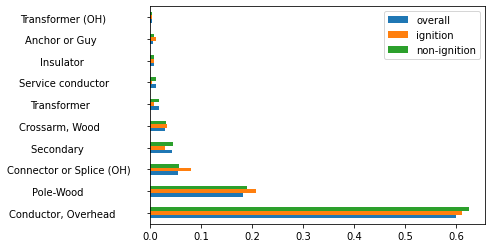

In [63]:
eq_types.sort_values('overall',ascending=False).iloc[:10].plot(kind='barh')

In [53]:
eq_types.sum()

overall         0.959427
ignition        0.439148
non-ignition    0.999739
dtype: float64